In [98]:
#hiding all warnings 
import warnings
warnings.filterwarnings('ignore')
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#scikitplot
from scikitplot.metrics import plot_roc_curve
#plot_metric
import plot_metric
from plot_metric.functions import BinaryClassification
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline as PP

#performance metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,roc_curve
from sklearn.metrics import f1_score,recall_score,precision_score,roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay
#gridsearchcv
from sklearn.model_selection import GridSearchCV
#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
#pip install scikit-plot

In [10]:
#conda install lightgbm

In [52]:
#pip install plot-metric

In [11]:
#dataset
df = pd.read_csv('income_evaluation (1).csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Understanting

In [12]:
#columns
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [14]:
#change the column names
for cols in df.columns:
    df.rename({cols:cols.replace('-','_')},axis=1,inplace=True)
    df.rename({cols:cols.replace(' ','')},axis=1,inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [15]:
#checking for null values
print(f'The number of features that has null values :{df.isnull().any().sum()}')

The number of features that has null values :0


In [16]:
#checking for duplicate values
df.duplicated().sum()

24

In [17]:
#drop the duplicate values
df.drop_duplicates(keep='first',inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
#the shape of df
df.shape

(32537, 15)

In [20]:
#describe data on the object dtype
df.describe(include='object').T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital_status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,32537,6,Husband,13187
race,32537,5,White,27795
sex,32537,2,Male,21775
native_country,32537,42,United-States,29153
income,32537,2,<=50K,24698


In [21]:
#describe data on the object dtype
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education_num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital_gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital_loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [22]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [23]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


# Visualizations to get insides from data

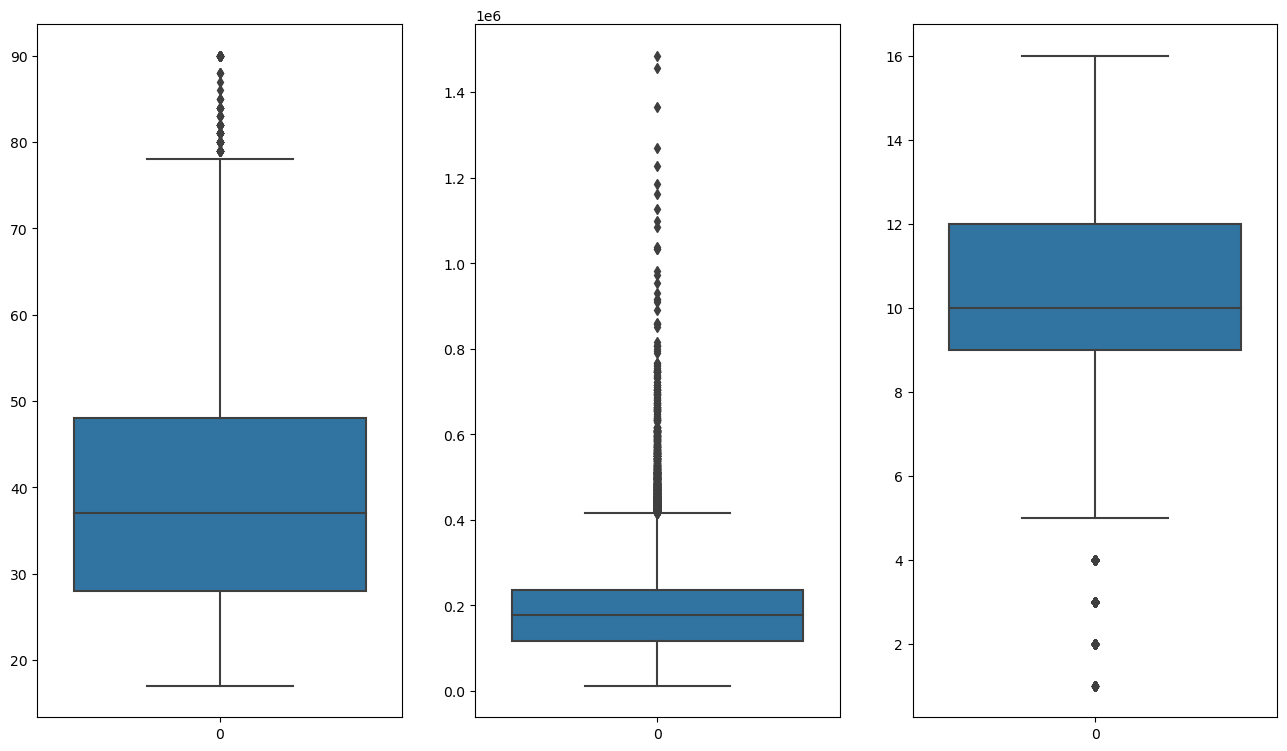

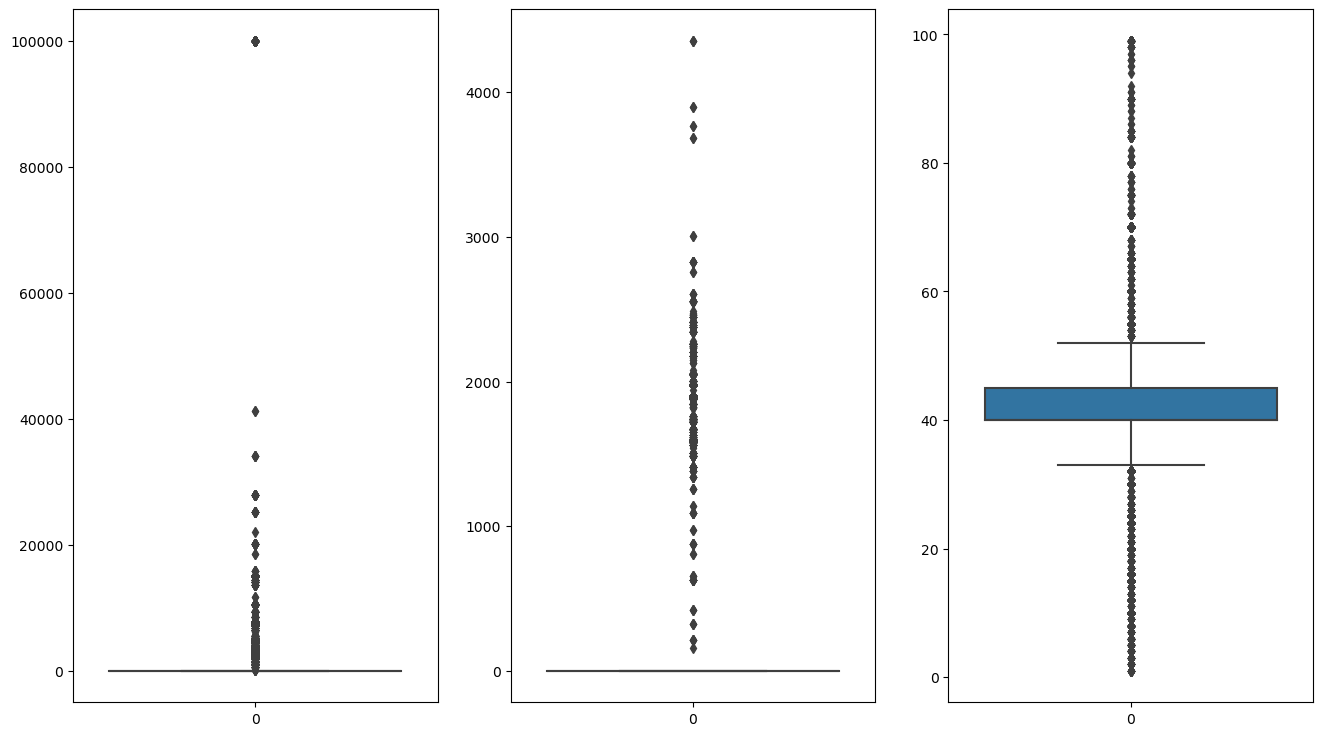

In [24]:
#box plots to see outliers in the data
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16,9))

fig = sns.boxplot(df['age'],ax=ax1)
fig = sns.boxplot(df['fnlwgt'],ax=ax2)
fig = sns.boxplot(df['education_num'],ax=ax3)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16,9))

fig = sns.boxplot(df['capital_gain'],ax=ax1)
fig = sns.boxplot(df['capital_loss'],ax=ax2)
fig = sns.boxplot(df['hours_per_week'],ax=ax3)

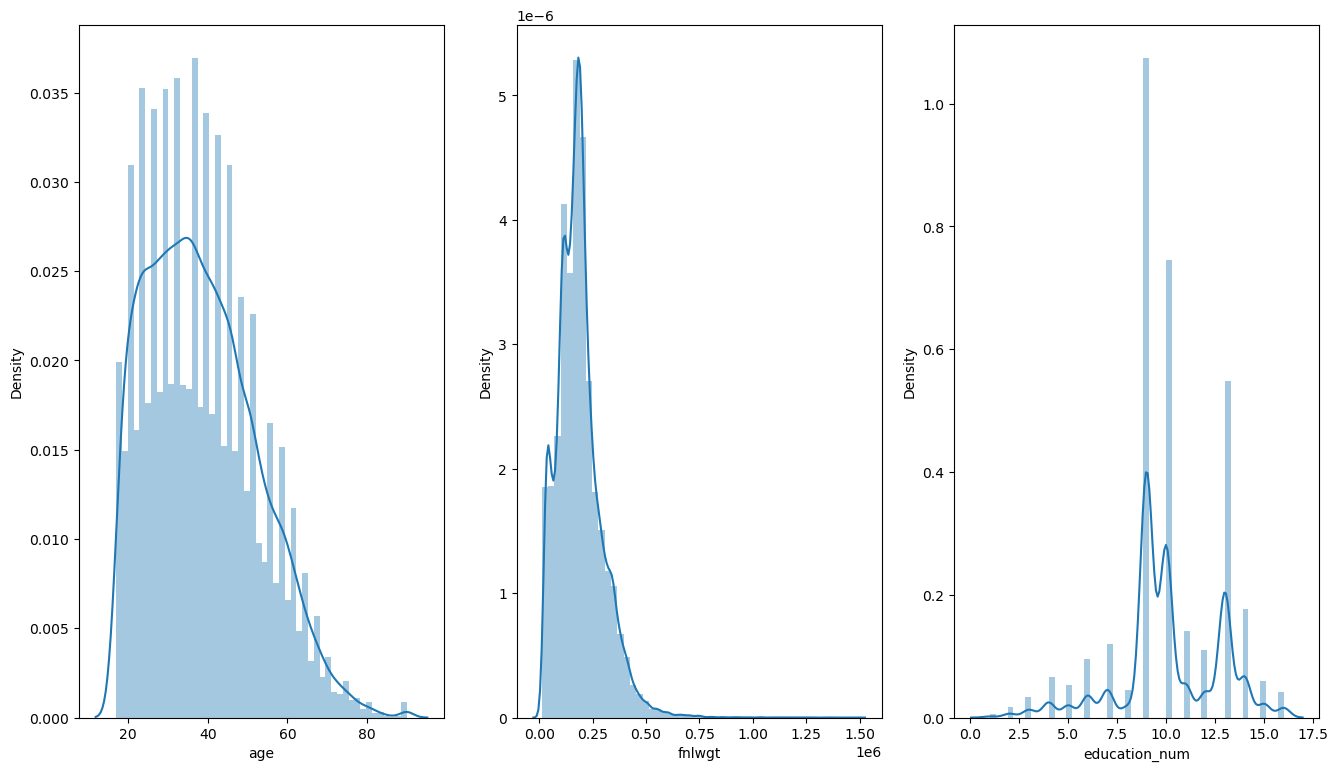

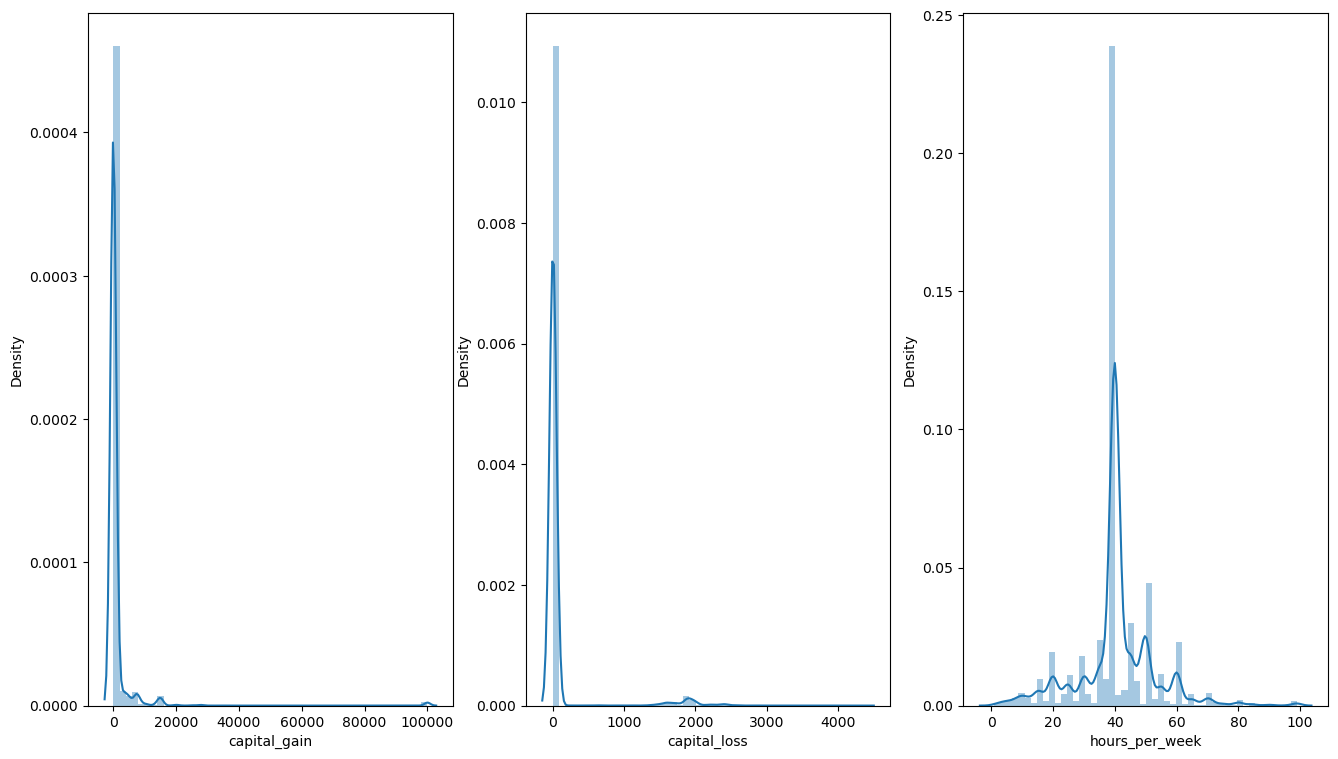

In [17]:
#distplot to show how distrute data
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16,9))

fig = sns.distplot(df['age'],ax=ax1)
fig = sns.distplot(df['fnlwgt'],ax=ax2)
fig = sns.distplot(df['education_num'],ax=ax3)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16,9))

fig = sns.distplot(df['capital_gain'],ax=ax1)
fig = sns.distplot(df['capital_loss'],ax=ax2)
fig = sns.distplot(df['hours_per_week'],ax=ax3)

plt.show()

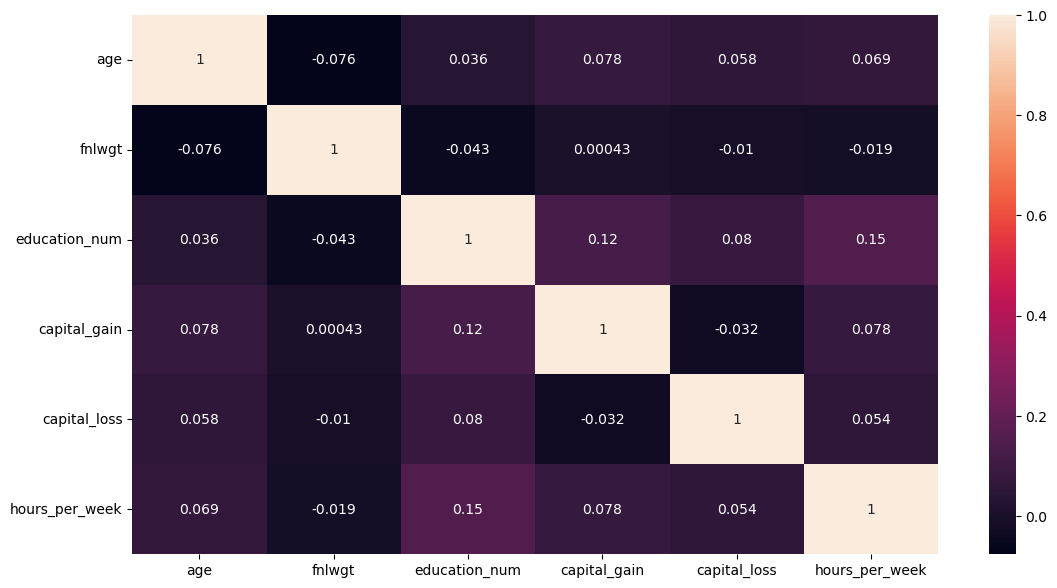

In [18]:
#correlation between features
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

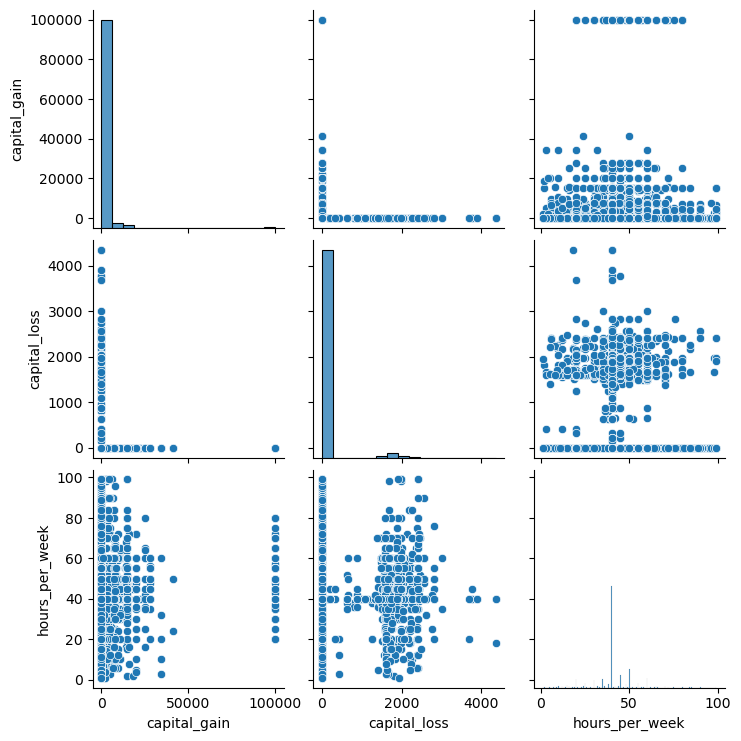

In [19]:
sns.pairplot(data = df,vars = ['capital_gain','capital_loss','hours_per_week'])
plt.show()

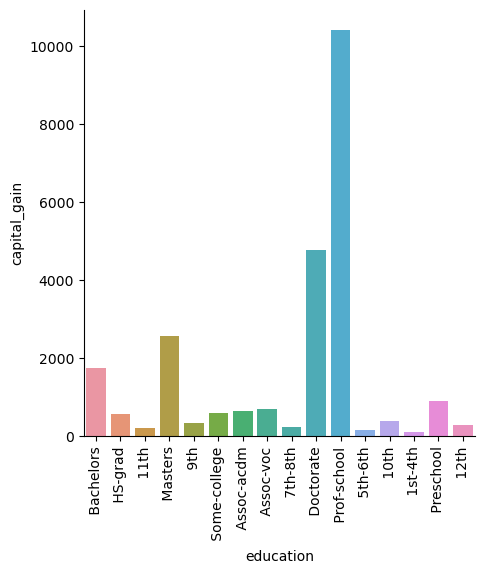

In [20]:
g = sns.catplot(x = 'education',y = 'capital_gain',data = df,kind = 'bar',ci = None)
g.set_xticklabels(rotation=90)
plt.show()

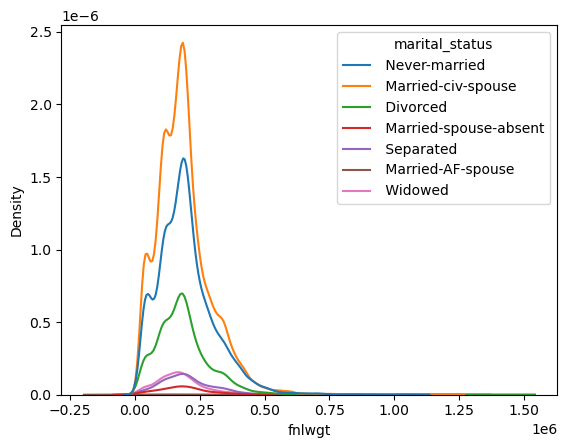

In [21]:
sns.kdeplot(x = 'fnlwgt',hue = 'marital_status',data = df)
plt.show()

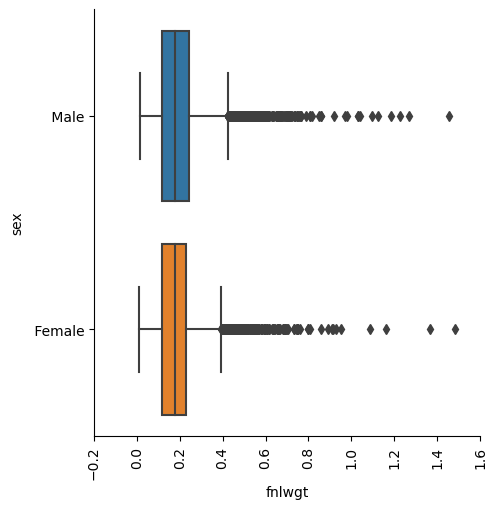

In [22]:
g = sns.catplot(x = 'fnlwgt',y = 'sex',data = df,kind = 'box')
g.set_xticklabels(rotation=90)
plt.show()

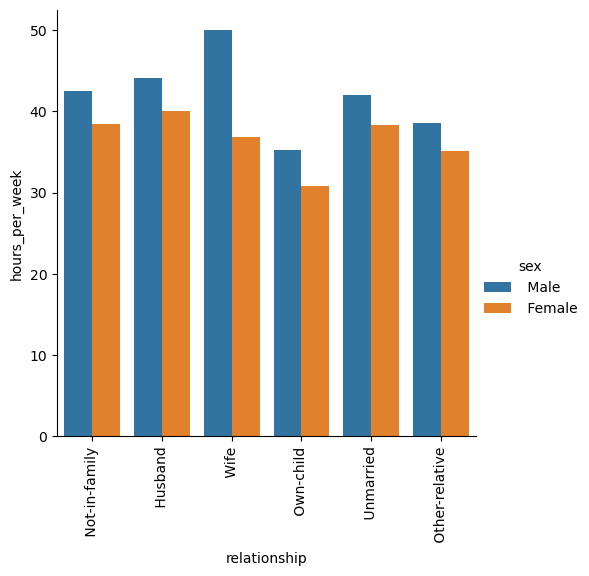

In [23]:
g = sns.catplot(x = 'relationship',y = 'hours_per_week',hue = 'sex',data = df,kind = 'bar',ci = None)
g.set_xticklabels(rotation=90)
plt.show()

# Preperation for the modelling

In [25]:
#checking for dirty values 
for cols in df.columns:
    if df[cols].dtype == 'object':
        print(df[cols].value_counts())

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial

In [26]:
#unique values in the object dtypes
for cols in df.columns:
    if df[cols].dtype == 'object':
        print(f"{cols}****************************************************************")
        print(df[cols].unique())

workclass****************************************************************
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education****************************************************************
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status****************************************************************
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation****************************************************************
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
rela

In [27]:
#column names that has dirty value(?)
dirty_columns = []
for cols in df.columns:
    if df[cols].dtype == 'object':
        if ' ?' in df[cols].unique():
            dirty_columns.append(cols)
print(dirty_columns)

['workclass', 'occupation', 'native_country']


In [28]:
#the most frequent data in the features that has dirty values
for cols in df.columns:
    if df[cols].dtype == 'object':
        if ' ?' in df[cols].unique():
               print(df[cols].value_counts()[:1])

 Private    22673
Name: workclass, dtype: int64
 Prof-specialty    4136
Name: occupation, dtype: int64
 United-States    29153
Name: native_country, dtype: int64


In [29]:
#changing dirty values(?) with the most frequent data
df['workclass'] = df["workclass"].replace([' ?'], ' Private')
df['occupation'] = df["occupation"].replace([' ?'], ' Prof-specialty')
df['native_country'] = df["native_country"].replace([' ?'], ' United-States')

In [30]:
#change target value(income) to numberds(0 and 1)
df['income'] = df['income'].replace({' <=50K': 0,' >50K': 1})
# df['native_country'] = df['native_country'].replace([' >50K'],0)

In [31]:
# Deleting some features
# education and education-num is the same thing,one of them can be deleted
df.drop('education',axis=1,inplace=True)

In [32]:
#correlation
print(df.corr()['income'])
#correlation is too low(<0.05),let's get delete it
df.drop('fnlwgt',axis=1,inplace=True)

age               0.234037
fnlwgt           -0.009502
education_num     0.335272
capital_gain      0.223336
capital_loss      0.150501
hours_per_week    0.229658
income            1.000000
Name: income, dtype: float64


# Encoding 

In [33]:
from sklearn.preprocessing import OneHotEncoder
#assigning categorical columns
categorical_cols = ['workclass','marital_status','occupation','relationship','race','sex','native_country']

one_hot_encoded_data = pd.get_dummies(df, columns = categorical_cols)
# Converting type of columns to category
df['workclass']=df['workclass'].astype('category')
df['marital_status']=df['marital_status'].astype('category')
df['occupation']=df['occupation'].astype('category')
df['relationship']=df['relationship'].astype('category')
df['race']=df['race'].astype('category')
df['sex']=df['sex'].astype('category')
df['native_country']=df['native_country'].astype('category')
 
# Assigning numerical values and storing it in another columns
df['workclass']=df['workclass'].cat.codes
df['marital_status']=df['marital_status'].cat.codes
df['occupation']=df['occupation'].cat.codes
df['relationship']=df['relationship'].cat.codes
df['race']=df['race'].cat.codes
df['sex']=df['sex'].cat.codes
df['native_country']=df['native_country'].cat.codes
 
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
 
#Passing encoded columns
enc_data=pd.DataFrame(enc.fit_transform(df[categorical_cols]))
 
#Merge with main
New_df=df.join(enc_data)
New_df.drop(New_df.columns[[13]], axis=1, inplace=True)
New_df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


# Train Test Spilitting

In [34]:
#choosing target and intepented variables
X = New_df.iloc[:,0:12]
y = New_df['income'].values
#train test splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Log transformation,Box-Cox and Yoe Johnson Normalization Methods

# Skewness before Normalization Methods(Log Transformation,Box-Cox and Yoe-Johnson)

In [35]:
#higly skewned columns(>2)
highly_skewed_columns = []
for col in New_df.columns:
    if New_df[col].skew() > 2:
        highly_skewed_columns.append(col)
print(highly_skewed_columns)

['capital_gain', 'capital_loss']


In [36]:
#highly skewness features
high_skew = []
for col in highly_skewed_columns:
    print(f'The Skewness of {col}: {df[col].skew()}')
    print(f'The Kurtosis of {col}: {df[col].kurt()}')
#kurtosis is too high,so the data has heavy tails,we need Normalization method that can be Log Trans,Yoe Johnson and 
#Boc-Cox

The Skewness of capital_gain: 11.949402833551463
The Kurtosis of capital_gain: 154.68295431938128
The Skewness of capital_loss: 4.592702423271812
The Kurtosis of capital_loss: 20.358254224040184


In [37]:
#checking for minimum values to choose which normalization method would be preferable
for col in highly_skewed_columns:
    print(f'The Minimum of {col}:{df[col].min()}')

The Minimum of capital_gain:0
The Minimum of capital_loss:0


  If We have high skewness and kurtosis at the some features,some Normalization methods would preferable like Box-Cox,Log Transformation and Yoe-Johnson
Box-Cox requires the input data to be strictly positive(not even zero is acceptable)
For features which have zeroes or negative values,Yoe johnson comes to the rescue

In [38]:
def plots(dataFrame, var, t):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' +  str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' +  str(t).split('(')[0])

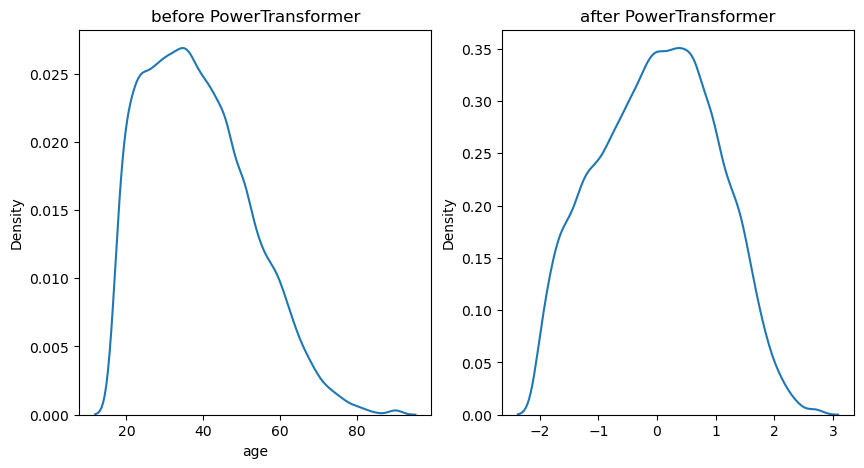

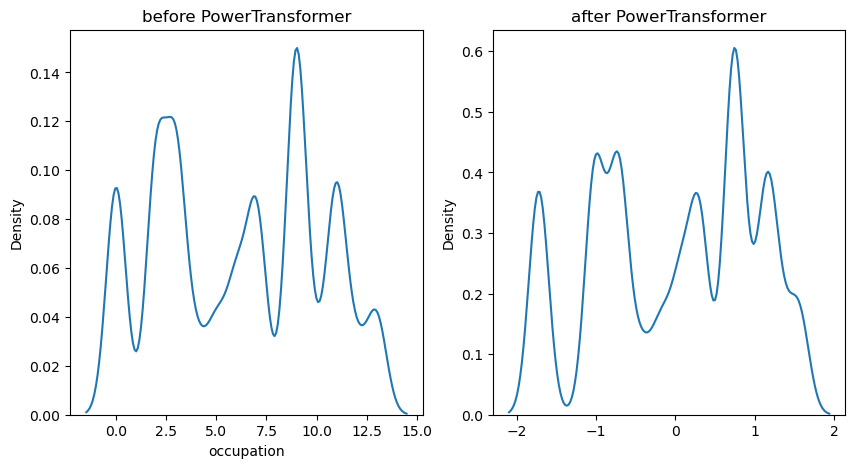

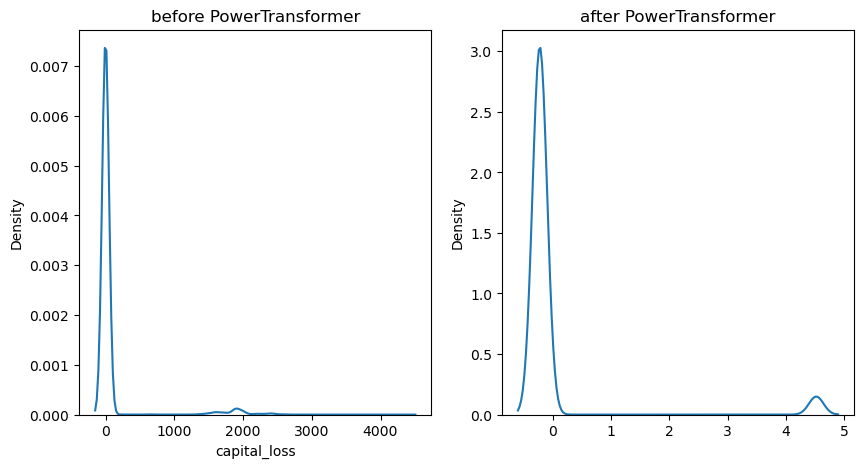

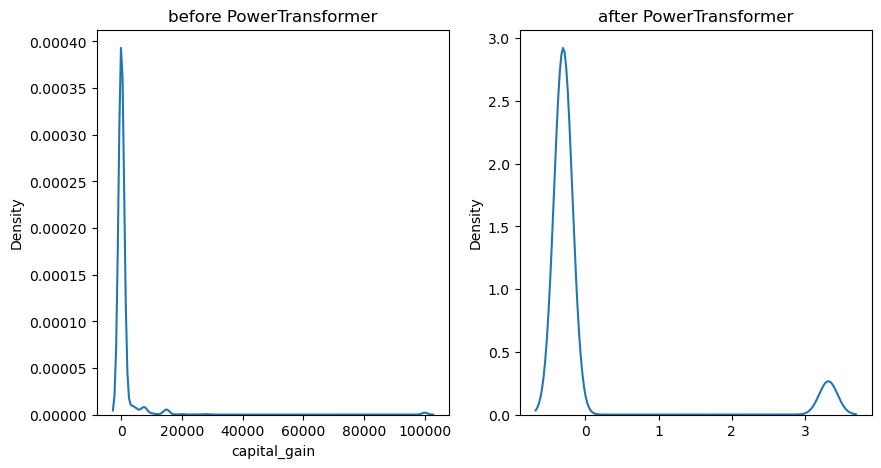

In [39]:
cols = ['age','occupation','capital_loss','capital_gain']
for col in cols:
    plots(X, col, PowerTransformer(method='yeo-johnson'))

In [40]:
from scipy.stats import yeojohnson

#transformation x_train
X_train['capital_loss'], lam = yeojohnson(X_train['capital_loss'])
X_train['capital_gain'], lam = yeojohnson(X_train['capital_gain'])

In [41]:
#modelling
def modelling(model):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    precision = precision_score(y_test,predictions)
    recall = recall_score(y_test,predictions)
    f1 = f1_score(y_test,predictions)
    roc_auc = roc_auc_score(y_test,predictions)    
    
    return accuracy,precision,recall,f1,roc_auc

#print evaul;ation metrics    
def metrics(model):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(f'Accuracy Score: {round(accuracy_score(y_test,predictions),2)} \
            \nPrecision Score: {round(precision_score(y_test,predictions),2)} \
            \nRecall Score: {round(recall_score(y_test,predictions),2)} \
            \nF1 Score: {round(f1_score(y_test,predictions),2)} \
            \nRoc Auc Score: {round(roc_auc_score(y_test,predictions),2)}')
    
#dataframe to compare all metrics in the 10 claasification models
def metrics_df(model):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc = round(accuracy_score(y_test,predictions),2) 
    precision = round(precision_score(y_test,predictions),2)
    recall = round(recall_score(y_test,predictions),2)
    f1 = round(f1_score(y_test,predictions),2)
    roc = round(roc_auc_score(y_test,predictions),2)
    return acc,precision,recall,f1,roc

#confusion matrix 
def plot_confusion_matrix(model):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test,predictions,labels = model.classes_)
    disp =  ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix: {model}')
    plt.show()
    
#roc curve
def roc_curve(model):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    
    # Visualisation with plot_metric
    bc = BinaryClassification(y_test, y_pred_proba,labels=["Class 1", "Class 2"])

    # Figures
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    plt.show()


# Modelling on the 10 models:
1. Logistic Regression
2. K-Nearest Neighbours
3. Naive Bayes
4. Support Vector Machine
5. Decision Tree Classifier
6. Random Forest Classifier
7. Linear Discriminant Analysis (LDA)
8. LightGBM (Light Gradient Boosting Machine)
9. XGBoost (Extreme Gradient Boosting)
10. CatBoost(Categorical Boosting)

### 1. Logistic Regression 

In [44]:
#evaluation metrics for Logistic regression
metrics(LogisticRegression())

Accuracy Score: 0.79             
Precision Score: 0.59             
Recall Score: 0.49             
F1 Score: 0.53             
Roc Auc Score: 0.69


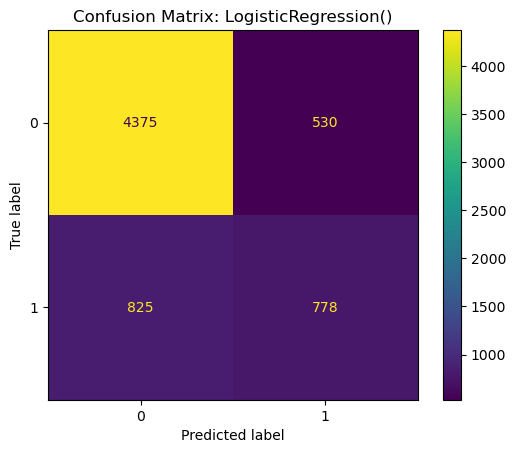

In [45]:
#confusion matrix for ligistic regression
plot_confusion_matrix(LogisticRegression())

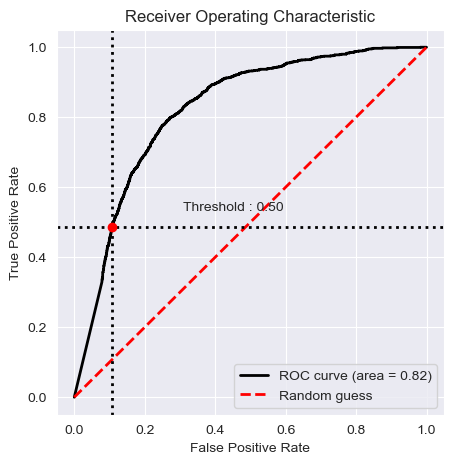

In [46]:
#roc_plot for ligistic regression
roc_curve(LogisticRegression())

### 2. K-Nearest Neighbours

In [47]:
metrics(KNeighborsClassifier())

Accuracy Score: 0.81             
Precision Score: 0.62             
Recall Score: 0.64             
F1 Score: 0.63             
Roc Auc Score: 0.76


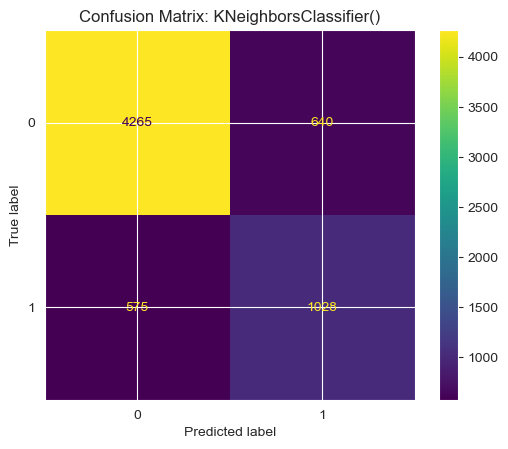

In [48]:
plot_confusion_matrix(KNeighborsClassifier())

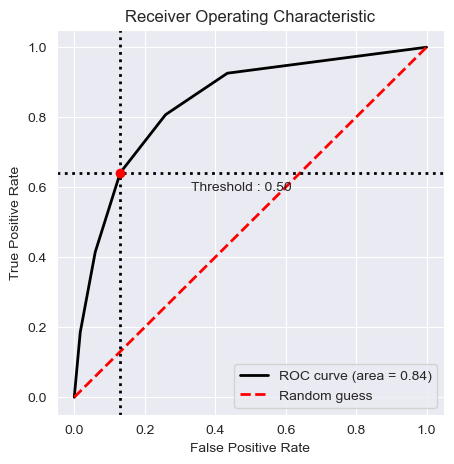

In [49]:
roc_curve(KNeighborsClassifier())

### 3. Naive Bayes

In [50]:
metrics(GaussianNB())

Accuracy Score: 0.8             
Precision Score: 0.6             
Recall Score: 0.58             
F1 Score: 0.59             
Roc Auc Score: 0.73


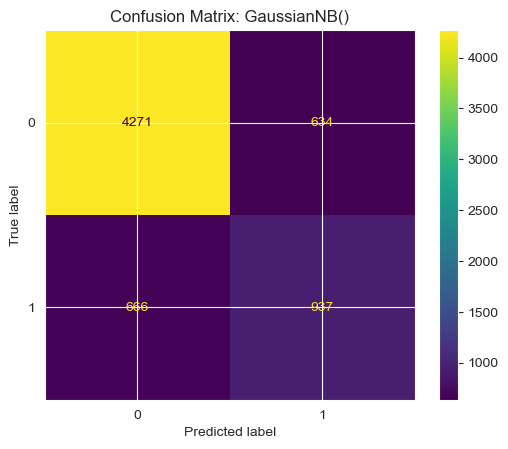

In [51]:
plot_confusion_matrix(GaussianNB())

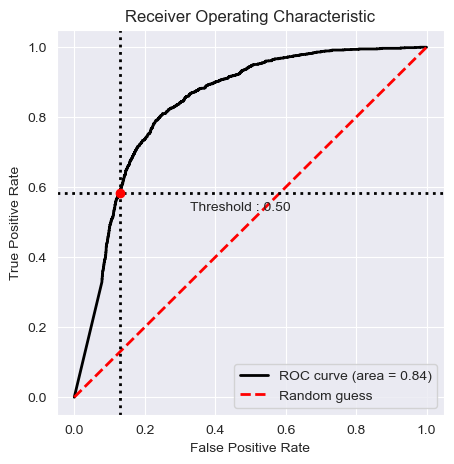

In [52]:
roc_curve(GaussianNB())

### 4. Support Vector Machine

In [56]:
metrics(SVC(kernel='rbf'))

Accuracy Score: 0.78             
Precision Score: 0.65             
Recall Score: 0.2             
F1 Score: 0.3             
Roc Auc Score: 0.58


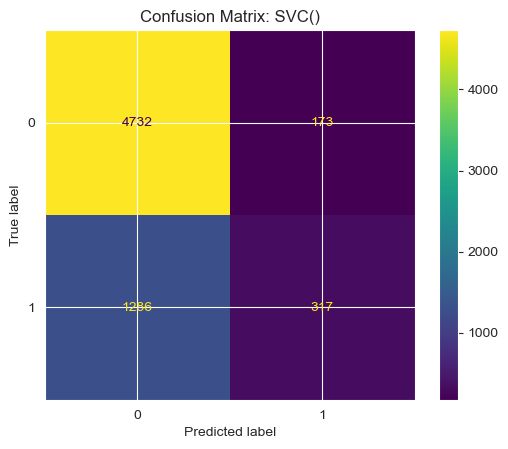

In [58]:
plot_confusion_matrix(SVC())

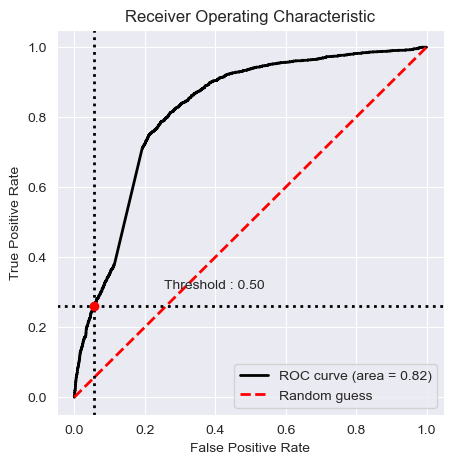

In [59]:
roc_curve(SVC(kernel = 'rbf',probability=True))

### 5. Decision Tree Classifier

In [60]:
metrics(DecisionTreeClassifier())

Accuracy Score: 0.78             
Precision Score: 0.55             
Recall Score: 0.62             
F1 Score: 0.58             
Roc Auc Score: 0.73


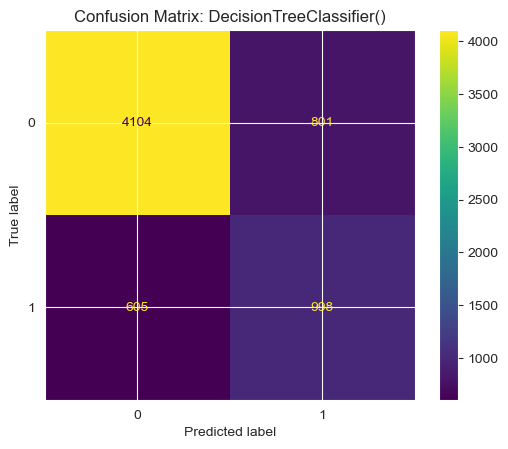

In [61]:
plot_confusion_matrix(DecisionTreeClassifier())

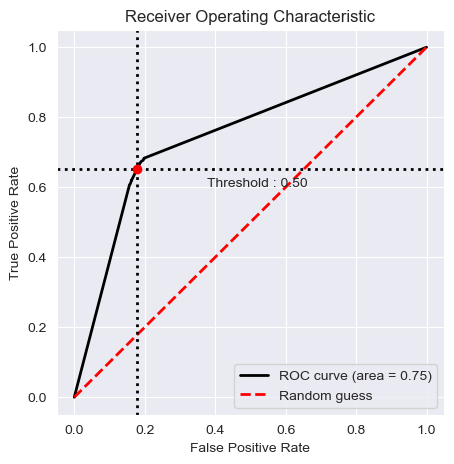

In [62]:
roc_curve(DecisionTreeClassifier())

### 6. Random Forest Classifier

In [63]:
metrics(RandomForestClassifier())

Accuracy Score: 0.82             
Precision Score: 0.63             
Recall Score: 0.65             
F1 Score: 0.64             
Roc Auc Score: 0.76


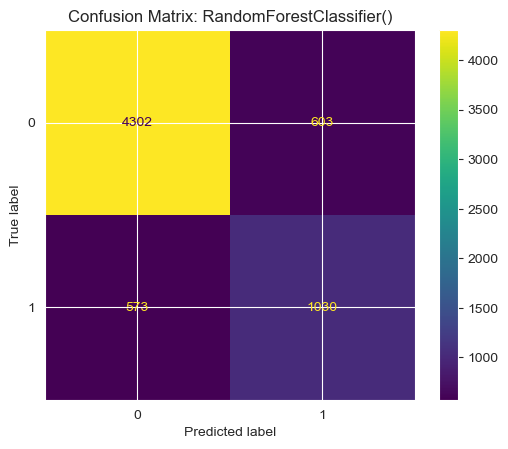

In [64]:
plot_confusion_matrix(RandomForestClassifier())

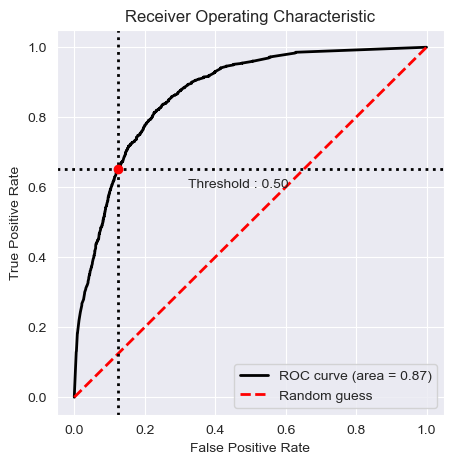

In [65]:
roc_curve(RandomForestClassifier())

### 7. Linear Discriminant Analysis (LDA)

In [66]:
metrics(LinearDiscriminantAnalysis())

Accuracy Score: 0.79             
Precision Score: 0.6             
Recall Score: 0.49             
F1 Score: 0.54             
Roc Auc Score: 0.69


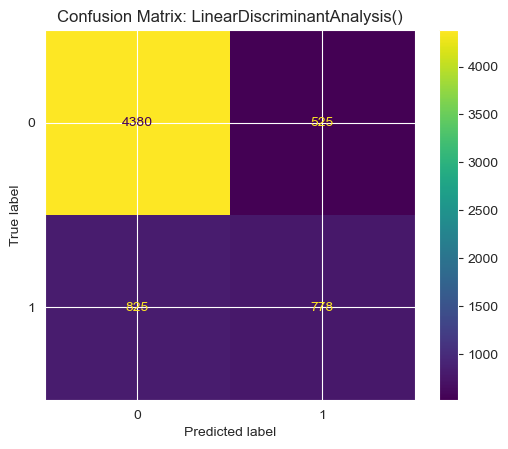

In [67]:
plot_confusion_matrix(LinearDiscriminantAnalysis())

In [68]:
#roc_curve(LinearDiscriminantAnalysis())

### 8. LightGBM (Light Gradient Boosting Machine)

In [69]:
metrics(LGBMClassifier())

Accuracy Score: 0.83             
Precision Score: 0.65             
Recall Score: 0.66             
F1 Score: 0.66             
Roc Auc Score: 0.77


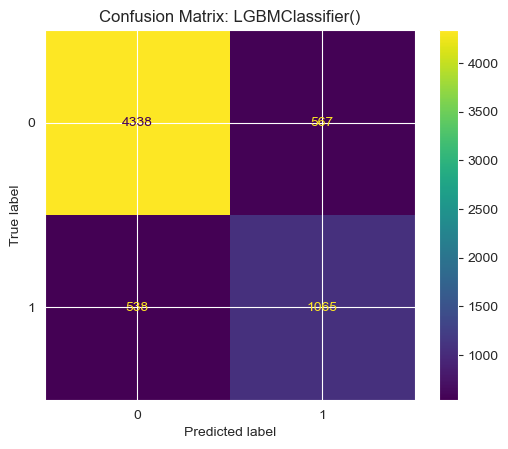

In [70]:
plot_confusion_matrix(LGBMClassifier())

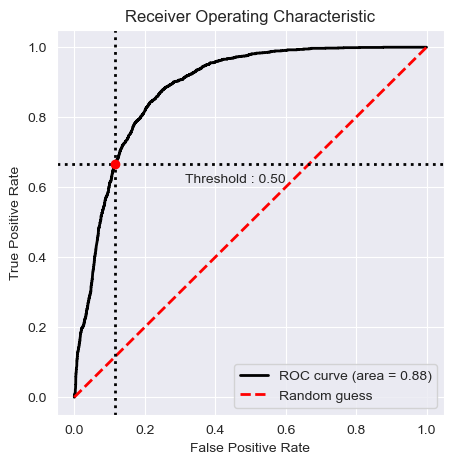

In [71]:
roc_curve(LGBMClassifier())

### 9. XGBoost (Extreme Gradient Boosting)

In [72]:
metrics(XGBClassifier())

Accuracy Score: 0.83             
Precision Score: 0.66             
Recall Score: 0.66             
F1 Score: 0.66             
Roc Auc Score: 0.78


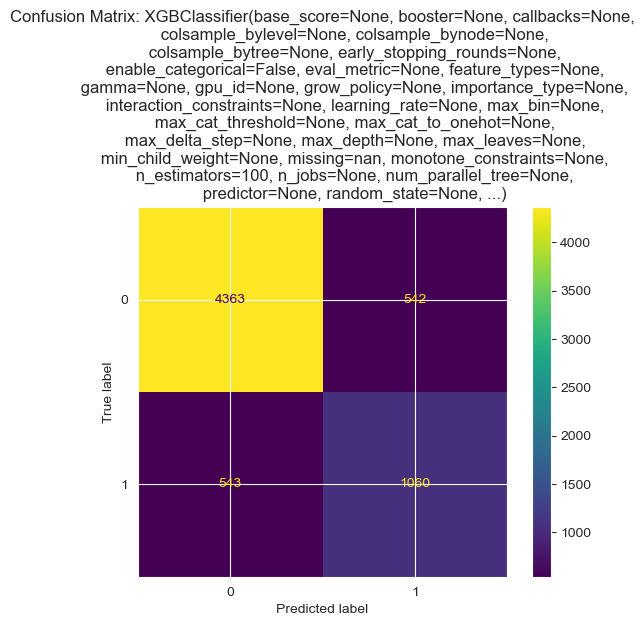

In [73]:
plot_confusion_matrix(XGBClassifier())

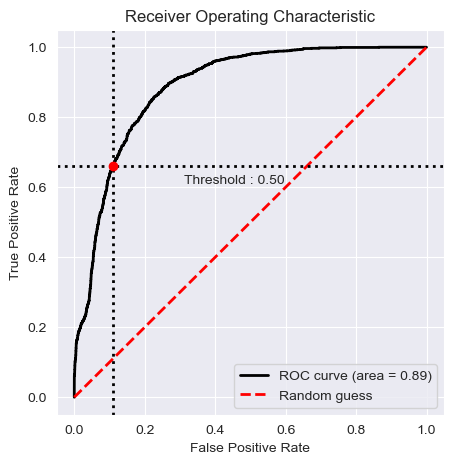

In [74]:
roc_curve(XGBClassifier())

### 10. CatBoost(Categorical Boosting)

In [81]:
metrics(CatBoostClassifier(logging_level= 'Silent'))

Accuracy Score: 0.84             
Precision Score: 0.67             
Recall Score: 0.66             
F1 Score: 0.66             
Roc Auc Score: 0.78


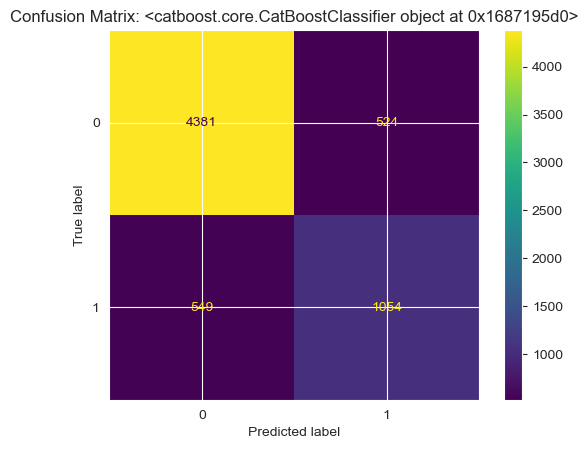

In [83]:
plot_confusion_matrix(CatBoostClassifier(logging_level = 'Silent'))

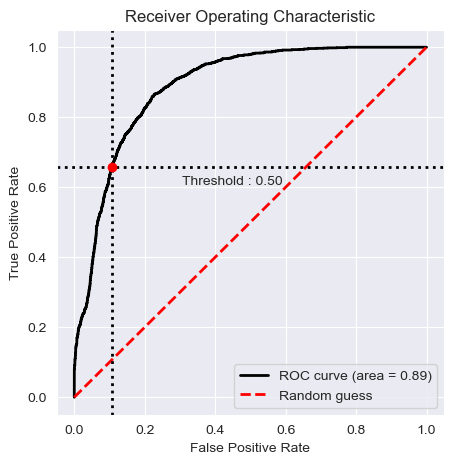

In [84]:
roc_curve(CatBoostClassifier(logging_level='Silent'))

# Compare all evaluation metrics in the all Models 

In [91]:
#creating dataframe to show best model
#setting column names
columns = ['Model','Accuracy','Precision','Recall','F1','Roc_Auc']
#creating dataframe
#Logistic Regression
final_df = pd.DataFrame(data=[['Logistic Regression',*metrics_df(LogisticRegression())]],
             columns = columns)

#sK-Nearest Neighbours
df2 = pd.DataFrame(data=[['K-Nearest Neighbours',*metrics_df(KNeighborsClassifier())]],
             columns = columns)
final_df = final_df.append(df2,ignore_index=True)

#Naive Bayes Classifier
df3 = pd.DataFrame(data=[['Naive Bayes Classifier',*metrics_df(GaussianNB())]],
             columns = columns)
final_df = final_df.append(df3,ignore_index=True)

#Support Vector Machine
df4 = pd.DataFrame(data=[['Support Vector Machine',*metrics_df(SVC())]],
             columns = columns)
final_df = final_df.append(df4,ignore_index=True)

#Decision Tree Classifier
df5 = pd.DataFrame(data=[['Decision Tree Classifier',*metrics_df(DecisionTreeClassifier())]],
             columns = columns)
final_df = final_df.append(df5,ignore_index=True)

#Random Forest Classifier
df6 = pd.DataFrame(data=[['Random Forest Classifier',*metrics_df(RandomForestClassifier())]],
             columns = columns)
final_df = final_df.append(df6,ignore_index=True)

#Linear Discriminant Analysis (LDA)
df7 = pd.DataFrame(data=[['Linear Discriminant Analysis (LDA)',*metrics_df(LinearDiscriminantAnalysis())]],
             columns = columns)
final_df = final_df.append(df7,ignore_index=True)

#LightGBM (Light Gradient Boosting Machine)
df7 = pd.DataFrame(data=[['LightGBM',*metrics_df(LGBMClassifier())]],
             columns = columns)
final_df = final_df.append(df7,ignore_index=True)

#XGBoost (Extreme Gradient Boosting)
df7 = pd.DataFrame(data=[['XGBoost',*metrics_df(XGBClassifier())]],
             columns = columns)
final_df = final_df.append(df7,ignore_index=True)

#CatBoost(Categorical Boosting)
df7 = pd.DataFrame(data=[['CatBoost',*metrics_df(CatBoostClassifier(logging_level='Silent'))]],
             columns = columns)
final_df = final_df.append(df7,ignore_index=True)

final_df = final_df.set_index(keys = ['Model'])

In [92]:
final_df

,Accuracy,Precision,Recall,F1,Roc_Auc
Model,,,,,
Logistic Regression,0.79,0.59,0.49,0.53,0.69
K-Nearest Neighbours,0.81,0.62,0.64,0.63,0.76
Naive Bayes Classifier,0.80,0.60,0.58,0.59,0.73
Support Vector Machine,0.78,0.65,0.20,0.30,0.58
Decision Tree Classifier,0.78,0.55,0.62,0.58,0.73
Random Forest Classifier,0.82,0.63,0.64,0.63,0.76
Linear Discriminant Analysis (LDA),0.79,0.60,0.49,0.54,0.69
LightGBM,0.83,0.65,0.66,0.66,0.77
XGBoost,0.83,0.66,0.66,0.66,0.78


In [94]:
#sorting by firstly accuracy,precision and then recall
final_df.sort_values(by = ['Accuracy','Precision','Recall'],ascending=False)

,Accuracy,Precision,Recall,F1,Roc_Auc
Model,,,,,
CatBoost,0.84,0.67,0.66,0.66,0.78
XGBoost,0.83,0.66,0.66,0.66,0.78
LightGBM,0.83,0.65,0.66,0.66,0.77
Random Forest Classifier,0.82,0.63,0.64,0.63,0.76
K-Nearest Neighbours,0.81,0.62,0.64,0.63,0.76
Naive Bayes Classifier,0.80,0.60,0.58,0.59,0.73
Linear Discriminant Analysis (LDA),0.79,0.60,0.49,0.54,0.69
Logistic Regression,0.79,0.59,0.49,0.53,0.69
Support Vector Machine,0.78,0.65,0.20,0.30,0.58


<div class="alert alert-block alert-danger">
<b>We can easily say that Cat Boost Classifier is a more successful model than the others.</b> 
</div>

# Improving Cat Boost Classifier with Grid Search

In [101]:
#setting parameters
parameters = {'depth': [4,5,6,7,8,9, 10],
              'learning_rate': [0.01,0.02,0.03,0.04],
              'iterations': [10, 20,30,40,50,60,70,80,90, 100]
                 }

#fitting gridsearhcv
gs = GridSearchCV(estimator=CatBoostClassifier(logging_level='Silent'),
                param_grid=parameters,
                   cv=5)
gs.fit(X_train,y_train)
#printing best parameters and best score for Cat Boost Classifier
print(f'The Best Parameters: {gs.best_params_}')
print(f'The Best Score: {gs.best_score_}')

The Best Parameters: {'depth': 10, 'iterations': 100, 'learning_rate': 0.04}
The Best Score: 0.8553921710816935


# Score is improved 0.855 from 0.84
